# Import Tools

In [1]:
!pip install pyclustertend

In [2]:
import sys
import time
import random

import numpy as np
import pandas as pd
import seaborn as sns

from math import ceil, isnan
from numpy.linalg import norm
import matplotlib.pyplot as plt
from pyclustertend import hopkins
from sklearn.preprocessing import scale

from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import calinski_harabasz_score

from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score

# Read Data

In [3]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

# Clean and Transform Data

In [4]:
df = df.rename({'tot_proteins': 'alkphos', 'albumin': 'sgpt', 
                'ag_ratio': 'sgot', 'sgpt': 'tot_proteins', 
                'sgot': 'albumin', 'alkphos': 'ag_ratio'}, axis=1)

In [5]:
columns = list(df.columns)
attributes = columns[:-1]
attributes

['age',
 'gender',
 'tot_bilirubin',
 'direct_bilirubin',
 'alkphos',
 'sgpt',
 'sgot',
 'tot_proteins',
 'albumin',
 'ag_ratio']

In [6]:
df['is_patient'] = df['is_patient'] - 1

In [7]:
df.shape

(583, 11)

In [8]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,alkphos,sgpt,sgot,tot_proteins,albumin,ag_ratio,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [9]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,alkphos,sgpt,sgot,tot_proteins,albumin,ag_ratio,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   alkphos           583 non-null    int64  
 5   sgpt              583 non-null    int64  
 6   sgot              583 non-null    int64  
 7   tot_proteins      583 non-null    float64
 8   albumin           583 non-null    float64
 9   ag_ratio          579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:
df['gender'].describe()

count      583
unique       2
top       Male
freq       441
Name: gender, dtype: object

In [12]:
gender = []
for i in df['gender']:
    gender.append(1 if i == 'Male' else 0)
df['gender'] = gender

In [13]:
df['ag_ratio'].isnull().sum()

4

In [14]:
df[df['ag_ratio'].isnull()]

,age,gender,tot_bilirubin,direct_bilirubin,alkphos,sgpt,sgot,tot_proteins,albumin,ag_ratio,is_patient
209,45,0,0.9,0.3,189,23,33,6.6,3.9,NaN,0
241,51,1,0.8,0.2,230,24,46,6.5,3.1,NaN,0
253,35,0,0.6,0.2,180,12,15,5.2,2.7,NaN,1
312,27,1,1.3,0.6,106,25,54,8.5,4.8,NaN,1


In [15]:
theoretical_agr = df['albumin']/(df['tot_proteins']-df['albumin'])

print("Given\tComputed")
avg_diff = 0

for i in range(len(theoretical_agr)):
    if isnan(df['ag_ratio'][i]):
        continue
    print(f"{df['ag_ratio'][i]}\t{round(theoretical_agr[i], 2)}")
    diff = abs(df['ag_ratio'][i] - round(theoretical_agr[i], 2))
    avg_diff += diff

print(f"\nAverage Difference:\t{round(avg_diff/(len(theoretical_agr)-4), 2)}\n")

Given	Computed
0.9	0.94
0.74	0.74
0.89	0.89
1.0	1.0
0.4	0.49
1.3	1.38
1.0	1.0
1.1	1.16
1.2	1.24
1.0	1.0
0.8	0.84
0.6	0.68
0.9	0.94
1.0	1.02
0.87	0.87
0.7	0.72
1.3	1.38
0.92	0.92
0.8	0.84
0.8	0.84
0.55	0.55
0.5	0.52
0.9	0.94
0.6	0.59
1.85	1.86
1.1	1.17
1.1	1.17
1.2	1.25
0.95	0.95
1.1	1.14
0.4	0.41
1.4	1.45
1.2	1.26
0.8	1.15
0.8	1.15
0.9	0.92
1.18	1.18
0.8	0.87
0.61	0.61
1.1	1.14
1.0	1.04
1.1	1.13
0.6	0.61
1.0	1.0
1.0	1.06
0.9	0.97
1.34	1.34
1.3	1.33
1.0	1.0
0.4	0.41
0.7	0.78
1.0	1.06
1.3	1.34
1.2	1.25
0.5	0.53
0.5	0.53
1.0	1.0
0.9	0.96
0.6	0.62
1.39	1.39
1.0	1.0
1.0	1.0
1.0	1.0
0.7	0.7
0.6	0.62
0.8	0.81
1.6	1.61
1.4	1.46
1.4	1.42
0.9	0.91
1.2	1.2
0.6	0.69
0.8	0.83
1.2	1.2
1.0	1.0
0.9	0.93
0.7	0.77
0.8	0.84
1.58	1.58
0.5	0.52
0.6	0.62
1.3	1.32
1.0	1.08
1.25	1.25
1.34	1.34
1.4	1.39
1.0	1.0
1.0	1.0
0.7	0.74
0.8	0.87
0.78	0.78
0.7	0.79
0.6	0.68
0.7	0.75
0.7	0.74
1.0	1.0
0.8	0.87
0.7	0.74
1.1	1.11
1.1	1.16
0.76	0.76
0.7	0.77
1.55	1.56
1.2	1.18
0.8	0.83
1.0	1.04
1.0	1.04
0.5	0.58
0.5	0.58
0.9

In [16]:
df['ag_ratio'].fillna(round(df['albumin']/(df['tot_proteins']-df['albumin']), 2), inplace=True)
df['ag_ratio'].isnull().sum()

0

# Analyze Attribute Behaviors

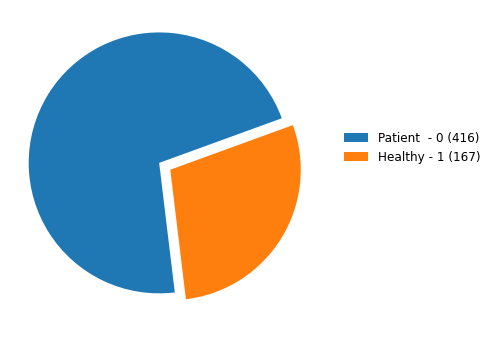

In [17]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))
labels = df.is_patient.value_counts()
plt.pie(labels, explode = [0.1,0], startangle=20)
labels = [f'Patient  - 0 ({labels[0]})',f'Healthy - 1 ({labels[1]})']
ax.legend(labels=labels, frameon=False, bbox_to_anchor=(1,0.65), fontsize=12)
plt.savefig('target_count.png')
plt.show()

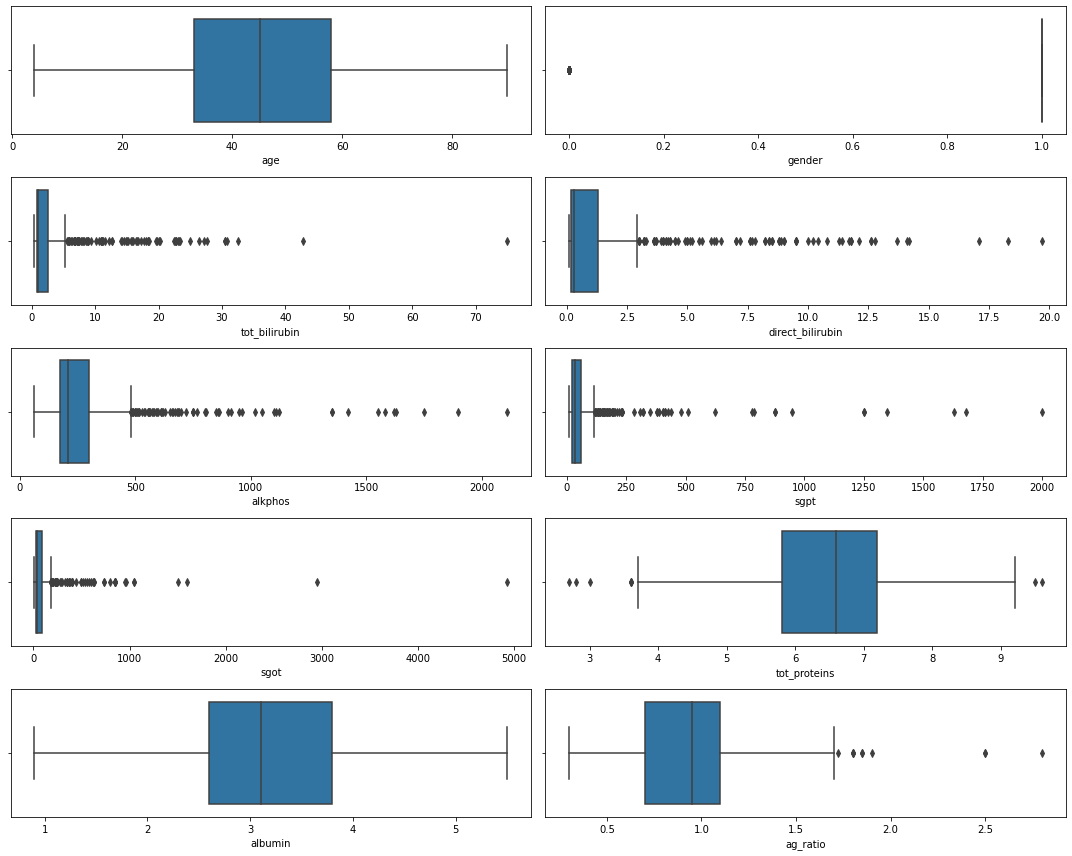

In [18]:
def attr_box_plot(df, columns, hue):
    nc = ceil(len(columns)/2)
    fig, ax = plt.subplots(nc, 2, figsize = (15, 12))
    for idx, column in enumerate(columns):
        sns.boxplot(x= df[column], ax = ax[int(idx/2),idx%2])
    plt.tight_layout()
    plt.savefig('attr_box_plot.png')
attr_box_plot(df, attributes, 'is_patient')

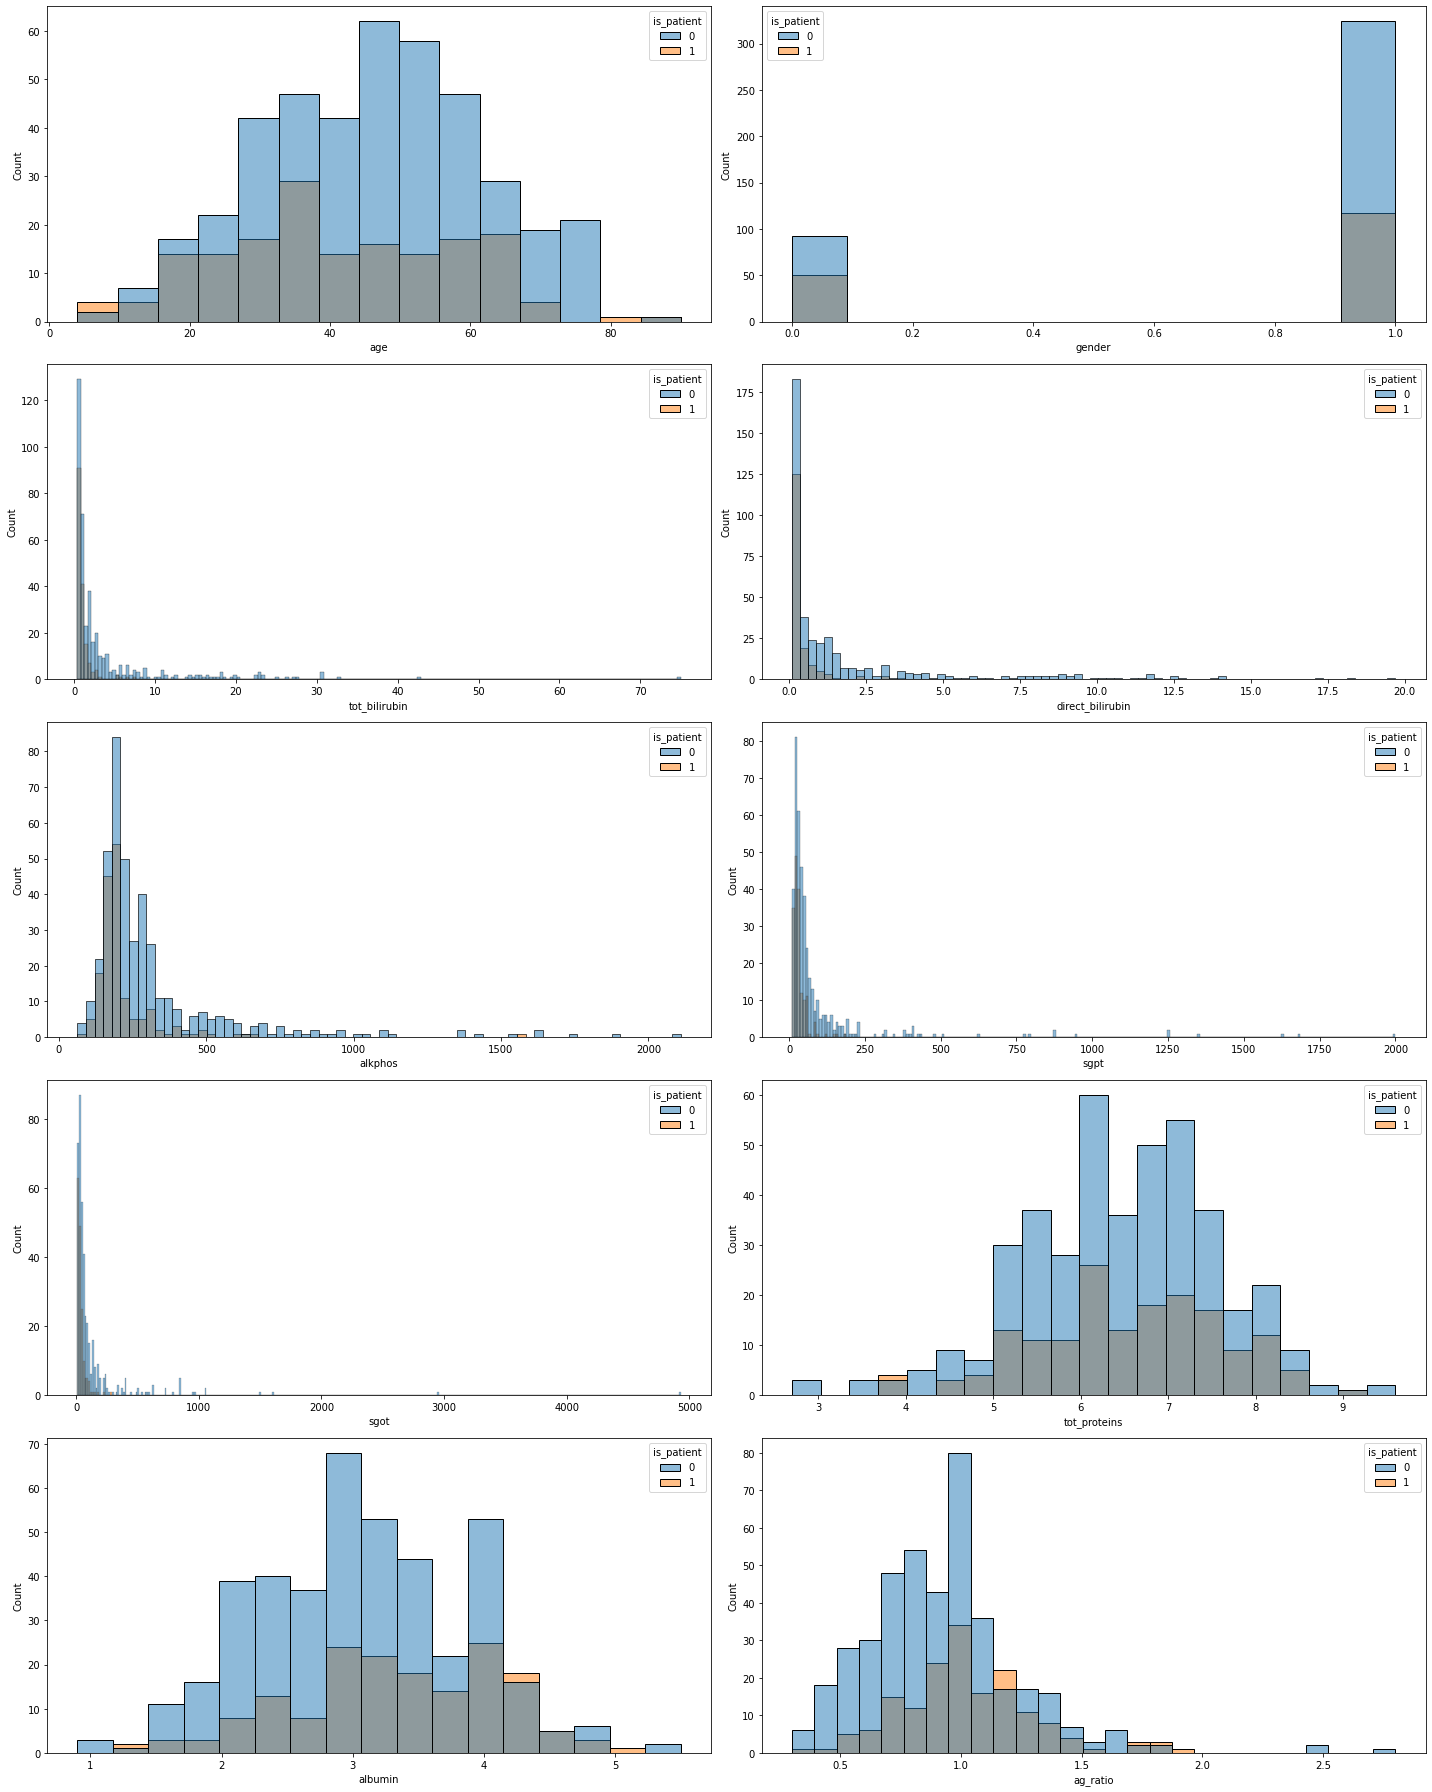

In [19]:
def attr_hist_plot(df, columns, hue):
    nc = ceil(len(columns)/2)
    fig, ax = plt.subplots(nc, 2, figsize = (20, 25))
    for idx, column in enumerate(columns):
        sns.histplot(df, x=column, hue=hue, ax = ax[int(idx/2),idx%2])
    plt.tight_layout()
    plt.savefig('attr_hist_plot.png')
attr_hist_plot(df, attributes, 'is_patient')

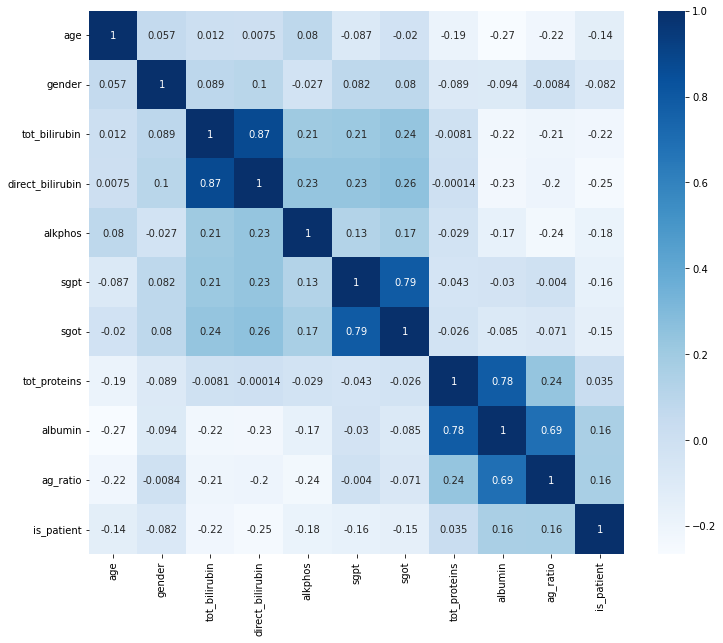

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap=plt.cm.Blues, annot=True)
plt.savefig('heatmap.png')
plt.show()

# Data Preprocessing

In [21]:
indirect_bilirubin = df['tot_bilirubin'] - df['direct_bilirubin']
df['indirect_bilirubin'] = indirect_bilirubin

In [22]:
globulin1 = df['tot_proteins'] - df['albumin']
globulin2 = df['albumin'] / df['ag_ratio']
globulin = []
for i, j in zip(globulin1, globulin2):
    globulin.append(round((i+j)/2, 2))
df['globulin'] = globulin

In [23]:
data = df
data = data.drop(['tot_bilirubin', 'tot_proteins'], axis=1)

# KMeans Class

In [24]:
class KMeans:
    """K-Means clustering

    Parameters
    ----------

    K : int, default: 5
        The number of clusters to form as well as the number of
        centroids to generate.
    
    max_iter : int, default: 300
        Maximum number of iterations of the k-means algorithm for
        a single run.

    centroids : array-list, preferred size: K, optional
        The list of datapoints selected as initial cluster centroids;
        If None, the K centroids are chosen randomly from the dataset;
        It is the list of centers (mean feature vector) for each cluster
    
    tol : float, default: 1e-5
        The tolerance regarding change in position of centroids to
        declare convergence.
    
    random_state : int, optional
        The seed used by the random numbers generator;
        If None, the random numbers generator is the RandomState instance
        used by `np.random`.
    
    Attributes
    ----------

    clusters_ : list, size: K
        The list of indexes of datapoints belonging to same cluster
    
    labels_ : 
        Labels of each point
    
    inertia_ : float
        Sum of squared distances of samples to their closest cluster center.

    Notes
    ------
    The k-means problem is solved using Lloyd's algorithm.
    
    The worst case complexity is given by O(n^(k+2/p)) with
    n = n_samples, p = n_features.
    
    The average complexity is given by O(k n T), were n is the number of
    samples and T is the number of iteration.

    In practice, the k-means algorithm is very fast (one of the fastest
    clustering algorithms available), but it falls in local minima.

    """

    def __init__(self, K=5, max_iter=300, centroids=None, 
                 tol=1e-5, random_state=None):
        self.K = K
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.clusters_ = [[] for _ in range(self.K)]
        self.centroids = []
        if centroids is not None:
            self.centroids = centroids

    def initialize_centroids(self, X):
        """If centroids passed as parameter is of size K, select them
        as the initial centroids. Ohterwise, randomly select K points
        from the dataset as the initial centroids.
        """
        if len(self.centroids) == self.K:
            return self.centroids
        if self.random_state:
            np.random.seed(self.random_state)
        random_sample_idxs = np.random.choice(X.shape[0], self.K, replace=False)
        self.centroids = [X[idx] for idx in random_sample_idxs]
        return self.centroids
    
    def get_centroids(self, clusters, X):
        """Assign mean value of the clusters to centroids.
        If there are no data points corresponding to a cluster,
        do not update its centroid. This is done to avoid `divide
        by zero` warning, and in no way can it change the results.
        """
        centroids_old = self.centroids
        centroids = np.zeros((self.K, X.shape[1]))
        for cluster_idx, cluster in enumerate(clusters):
            if len(X[cluster]) > 0:
                cluster_mean = np.mean(X[cluster], axis=0)
                centroids[cluster_idx] = cluster_mean
            else:
                centroids[cluster_idx] = centroids_old[cluster_idx]
        return centroids

    def fit(self, X):
        """Compute k-means clustering"""

        centroids = self.initialize_centroids(X)
        for _ in range(self.max_iter):
            self.clusters_ = self.create_clusters(self.centroids, X)
            centroids_old = self.centroids

            self.centroids = self.get_centroids(self.clusters_, X)
            if self.is_converged(centroids_old, self.centroids):
                break
        self.labels_ = self.get_cluster_labels(self.clusters_, X)
        self.inertia_ = self.compute_sse(X, self.labels_, self.centroids)

    def predict(self, X):
        """Predict and return cluster index for each sample according to the 
        centroid closest to that sample.
        """
        predictions = []
        centroids = self.centroids
        for i in X:
            predictions.append(self.get_closest_cluster(i, centroids))
        return predictions

    def fit_predict(self, X):
        """Compute cluster centers and predict cluster index for each sample.
        Equivalent to calling fit(X) followed by predict(X).
        Returns index of the cluster each sample belongs to.
        """
        self.fit(X)
        return self.labels_

    def compute_sse(self, X, labels, centroids):
        """Compute the sum of squared errors or each sample"""

        dist = np.zeros(X.shape[0])
        for i in range(self.K):
            dist[labels==i] = norm(X[labels==i] - centroids[i], axis=1)
        return np.sum(np.square(dist))

    def get_cluster_labels(self, clusters, X):
        """Compute and return the label of the cluster each of the 
        samples were assigned to.
        """
        labels = np.empty(X.shape[0])

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def create_clusters(self, centroids, X):
        """Assign the samples to the closest centroids to create clusters"""

        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(X):
            centroid_idx = self.get_closest_cluster(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def get_closest_cluster(self, sample, centroids):
        """Minimum distance of the current sample from the cluster centroids"""

        distances = self.compute_distance(sample, centroids)
        closest_index = np.argmin(distances)
        return closest_index
    
    def compute_distance(self, sample, centroids):
        """Euclidean distance of a sample from each of the cluster centroids"""

        distances = [self.euclidean_distance(sample, pt) for pt in centroids]
        return distances

    def euclidean_distance(self, x1, x2):
        """Euclidean distance between two points"""
        
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def is_converged(self, centroids_old, centroids):
        """Check for convergence using distances between each pair of old and 
        new centroids, for the K cluster centroids
        """
        
        distances = [self.euclidean_distance(centroids_old[i], 
                        centroids[i]) for i in range(self.K)]
        return ((sum(distances)/(self.K)) <= self.tol)

# Model

In [25]:
X = data.drop('is_patient', axis=1).values
y = data['is_patient'].values

In [26]:
k = 2     # number of clusters, can be changed by the user

In [27]:
kmeans = KMeans(K=k, max_iter=300)
labels = kmeans.fit_predict(X).astype(int)

# Clustering Performance

In [28]:
dat_sc = scale(data.values)
print(f'Hopkins Test Value = {hopkins(dat_sc, dat_sc.shape[0])}')

Hopkins Test Value = 0.0859445710691998


In [29]:
print("Clustering Performance using available ground truth")
print(f"    Adjusted Random Score: {adjusted_rand_score(y, labels)}")
print(f"    Adjusted Mutual Info Score: {adjusted_mutual_info_score(y, labels)}")
print(f"    Homogeneity Score: {homogeneity_score(y, labels)}")
print(f"    Normalized Mutual Info Score: {normalized_mutual_info_score(y, labels)}")
print(f"    Fowlkes Mallows Score: {fowlkes_mallows_score(y, labels)}")

Clustering Performance using available ground truth
    Adjusted Random Score: -0.029331321539159117
    Adjusted Mutual Info Score: 0.023559703308099738
    Homogeneity Score: 0.015722854532590588
    Normalized Mutual Info Score: 0.02598944815004637
    Fowlkes Mallows Score: 0.7393925988657917


In [30]:
print("Clustering Performance without ground truth")
print(f"    Silhouette Score: {silhouette_score(X, labels)}")
print(f"    Calinski Harabasz Score: {calinski_harabasz_score(X, labels)}")

Clustering Performance without ground truth
    Silhouette Score: 0.8312278971755893
    Calinski Harabasz Score: 338.5088844274287


# Determine most suitable K

In [50]:
def performance_on_k(X, kmax):
    wss = []
    scs = []
    for k in range(1, kmax+1):
      kmeans = KMeans(K=k, max_iter=300)
      labels = kmeans.fit_predict(X)
      wss.append(kmeans.inertia_)
      if k > 1:
          sc = silhouette_score(X, labels)
          scs.append(sc)
    return wss, scs

In [51]:
wss, scs = performance_on_k(X, 10)

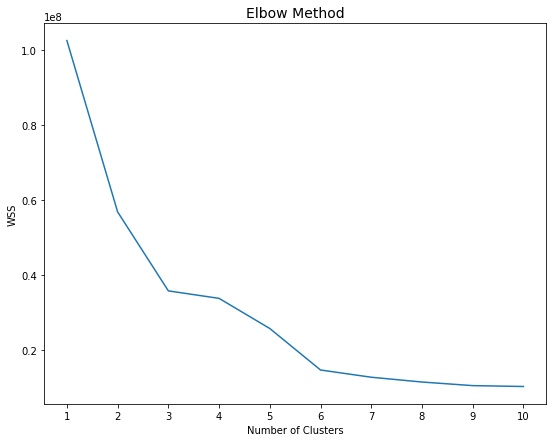

In [60]:
plt.rcParams['figure.figsize'] = (9,7)
plt.plot(range(1, 11), wss)
plt.title('Elbow Method', fontsize=14)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.savefig('k-elbow')
plt.show()

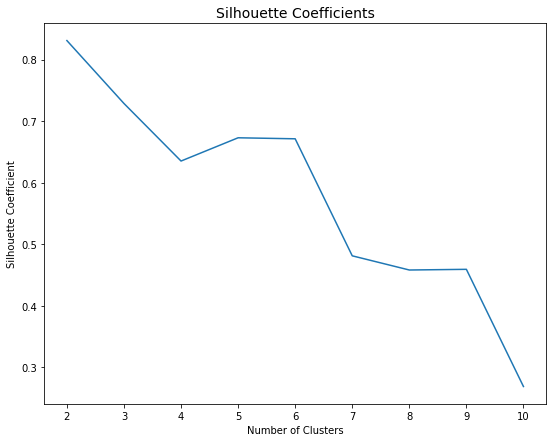

In [53]:
plt.rcParams['figure.figsize'] = (9,7)
plt.plot(range(2, 11), scs)
plt.title('Silhouette Coefficients', fontsize=14)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.savefig('k-silhouette')
plt.show()

# Test-A

In [35]:
start_time = time.time()

K = 2     # number of clusters

aris = []
fmss = []

rs = []
for i in range(50):
    rs.append(random.randint(0, 1000))

for i in range(50):
    if (i+1)%5 == 0:
        print(f'Iteration {i+1}:\t', end='')
    X = data.drop('is_patient', axis=1).values
    y = data['is_patient'].values

    np.random.seed(rs[i])
    random_sample_idxs = np.random.choice(X.shape[0], K, replace=False)
    centroids = [X[idx] for idx in random_sample_idxs]
    idx_sort = random_sample_idxs
    idx_sort[::-1].sort()
    for j in idx_sort:
        X = np.delete(X, (j), axis=0)
        y = np.delete(y, j)
        
    ari = 0
    fms = 0
    for j in range(50):
        r = random.randint(0, 1000)
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=r)
        kmeans = KMeans(K=K, max_iter=300, centroids=centroids)
        kmeans.fit(X_train)
        labels = kmeans.predict(X_test)
        ari += adjusted_rand_score(Y_test, labels)
        fms += fowlkes_mallows_score(Y_test, labels)

    ari /= 50
    fms /= 50
    aris.append(ari)
    fmss.append(fms)
    if (i+1)%5 == 0:
        print(f'ARI = {round(ari, 5)}\tFMS = {round(fms, 5)}')
    
end_time = time.time()
print(f'\nTime Taken = {round(end_time-start_time, 3)} seconds')

Iteration 5:	ARI = -0.03077	FMS = 0.73315
Iteration 10:	ARI = -0.03116	FMS = 0.73483
Iteration 15:	ARI = -0.02379	FMS = 0.74863
Iteration 20:	ARI = -0.02739	FMS = 0.73368
Iteration 25:	ARI = -0.02491	FMS = 0.73498
Iteration 30:	ARI = -0.02373	FMS = 0.74966
Iteration 35:	ARI = -0.03242	FMS = 0.73004
Iteration 40:	ARI = -0.02618	FMS = 0.73423
Iteration 45:	ARI = -0.03344	FMS = 0.72916
Iteration 50:	ARI = -0.02986	FMS = 0.73139

Time Taken = 497.0 seconds


In [36]:
ari_mean = np.mean(aris)
ari_median = np.median(aris)
ari_q1 = np.percentile(aris, 25, interpolation="midpoint")
ari_q3 = np.percentile(aris, 75, interpolation="midpoint")
ari_iqr = ari_q3 - ari_q1
ari_range = (round(min(aris), 5), round(max(aris), 5))
ari_std = np.std(aris)
ari_mnad = np.mean(np.absolute(aris - ari_mean))
ari_mdnad = np.median(np.absolute(aris - ari_median))

fms_mean = np.mean(fmss)
fms_median = np.median(fmss)
fms_q1 = np.percentile(fmss, 25, interpolation="midpoint")
fms_q3 = np.percentile(fmss, 75, interpolation="midpoint")
fms_iqr = fms_q3 - fms_q1
fms_range = (round(min(fmss), 5), round(max(fmss), 5))
fms_std = np.std(fmss)
fms_mnad = np.mean(np.absolute(fmss - fms_mean))
fms_mdnad = np.median(np.absolute(fmss - fms_median))

In [37]:
print("Dispersion of ARI\n")
print(f'Mean:\t\t\t\t{round(ari_mean, 5)}')
print(f'Median:\t\t\t\t{round(ari_median, 5)}')
print(f'1st Quartile:\t\t\t{round(ari_q1, 5)}')
print(f'3rd Quartile:\t\t\t{round(ari_q3, 5)}')
print(f'IQR:\t\t\t\t{round(ari_iqr, 5)}')
print(f'Range:\t\t\t\t{ari_range}')
print(f'STD:\t\t\t\t{round(ari_std, 5)}')
print(f'Mean Absolute Deviation:\t{round(ari_mnad, 5)}')
print(f'Median Absolute Deviation:\t{round(ari_mdnad, 5)}')

Dispersion of ARI

Mean:				-0.0286
Median:				-0.02881
1st Quartile:			-0.03242
3rd Quartile:			-0.02589
IQR:				0.00653
Range:				(-0.03717, -0.0141)
STD:				0.00511
Mean Absolute Deviation:	0.00414
Median Absolute Deviation:	0.00342


In [38]:
print("Dispersion of FMS\n")
print(f'Mean:\t\t\t\t{round(fms_mean, 5)}')
print(f'Median:\t\t\t\t{round(fms_median, 5)}')
print(f'1st Quartile:\t\t\t{round(fms_q1, 5)}')
print(f'3rd Quartile:\t\t\t{round(fms_q3, 5)}')
print(f'IQR:\t\t\t\t{round(fms_iqr, 5)}')
print(f'Range:\t\t\t\t{fms_range}')
print(f'STD:\t\t\t\t{round(fms_std, 5)}')
print(f'Mean Absolute Deviation:\t{round(fms_mnad, 5)}')
print(f'Median Absolute Deviation:\t{round(fms_mdnad, 5)}')

Dispersion of FMS

Mean:				0.73478
Median:				0.73395
1st Quartile:			0.72981
3rd Quartile:			0.73677
IQR:				0.00696
Range:				(0.71847, 0.7528)
STD:				0.00756
Mean Absolute Deviation:	0.00559
Median Absolute Deviation:	0.00383


In [39]:
x = [i+1 for i in range(50)]

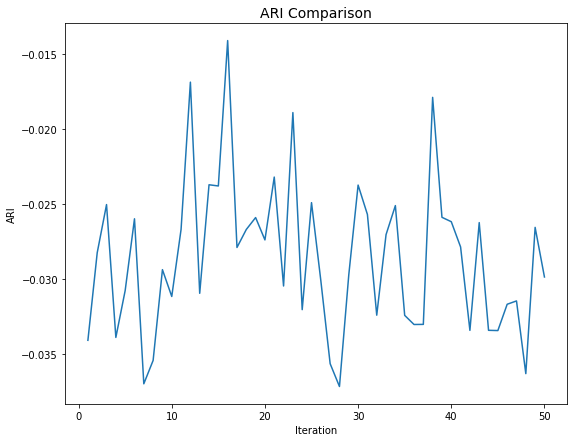

In [40]:
plt.rcParams['figure.figsize'] = (9,7)
plt.title('ARI Comparison', fontsize=14)
plt.plot(x, aris)
plt.xlabel("Iteration")
plt.ylabel("ARI")
plt.savefig('aris.png')
plt.show()

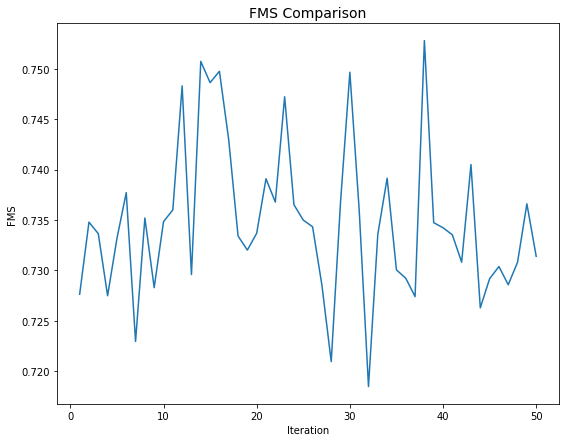

In [41]:
plt.rcParams['figure.figsize'] = (9,7)
plt.title('FMS Comparison', fontsize=14)
plt.plot(x, fmss)
plt.xlabel("Iteration")
plt.ylabel("FMS")
plt.savefig('fmss.png')
plt.show()

# Heuristic to minimize variations

In [61]:
def get_distance(x1, x2):
    """Compute euclidean distance between two points"""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def get_kmeanspp_centroids(X, k):
    """Initialize the centroids for K-means++

    Parameters
    ----------

    X : array
        The array of all data points; have the shape [n_samples, n_features]

    k : int
        The number of clusters to form as well as the number of
        centroids to generate.
    
    Returns
    -------

    centroids_idx : list
        The list of indexes of centroids selected from dataset

    centroids : list
        The list of data points selected as centroids
    """
    centroids = []
    centroids_idx = []
    idx = np.random.randint(X.shape[0])
    centroids.append(X[idx, :])
    centroids_idx.append(idx)
  
    for _ in range(k-1):
        dist = []
        for i in range(X.shape[0]):
            pt = X[i, :]
            min_d = sys.maxsize
            for j in range(len(centroids)):
                curr = get_distance(pt, centroids[j])
                min_d = min(min_d, curr)
            dist.append(min_d)
        dist = np.array(dist)
        idx = np.argmax(dist)
        nxt = X[idx, :]
        centroids.append(nxt)
        centroids_idx.append(idx)
    return centroids_idx, centroids

# Test-A for the heuristic

In [62]:
start_time = time.time()

K = 2     # number of clusters

aris2 = []
fmss2 = []

rs2 = []
for i in range(50):
    rs2.append(random.randint(0, 1000))

for i in range(50):
    if (i+1)%5 == 0:
        print(f'Iteration {i+1}:\t', end='')
    X = data.drop('is_patient', axis=1).values
    y = data['is_patient'].values

    np.random.seed(rs2[i])
    centroids_idx, centroids = get_kmeanspp_centroids(X, K)
    idx_sort = centroids_idx
    idx_sort[::-1].sort()
    for j in idx_sort:
        X = np.delete(X, (j), axis=0)
        y = np.delete(y, j)
        
    ari = 0
    fms = 0
    for j in range(50):
        r = random.randint(0, 1000)
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=r)
        kmeans = KMeans(K=K, max_iter=300, centroids=centroids)
        kmeans.fit(X_train)
        labels = kmeans.predict(X_test)
        ari += adjusted_rand_score(Y_test, labels)
        fms += fowlkes_mallows_score(Y_test, labels)

    ari /= 50
    fms /= 50
    aris2.append(ari)
    fmss2.append(fms)
    
    if (i+1)%5 == 0:
        print(f'ARI = {round(ari, 5)}\tFMS = {round(fms, 5)}')

end_time = time.time()
print(f'\nTime Taken for KMeans++ = {round(end_time-start_time, 3)} seconds')

Iteration 5:	ARI = -0.01394	FMS = 0.7513
Iteration 10:	ARI = -0.01615	FMS = 0.75108
Iteration 15:	ARI = -0.01353	FMS = 0.75692
Iteration 20:	ARI = -0.01733	FMS = 0.74987
Iteration 25:	ARI = -0.01501	FMS = 0.75902
Iteration 30:	ARI = -0.01427	FMS = 0.75131
Iteration 35:	ARI = -0.0056	FMS = 0.75939
Iteration 40:	ARI = -0.01352	FMS = 0.75723
Iteration 45:	ARI = -0.01473	FMS = 0.75544
Iteration 50:	ARI = -0.01434	FMS = 0.75402

Time Taken for KMeans++ = 164.912 seconds


In [63]:
ari_mean_2 = np.mean(aris2)
ari_median_2 = np.median(aris2)
ari_q1_2 = np.percentile(aris2, 25, interpolation="midpoint")
ari_q3_2 = np.percentile(aris2, 75, interpolation="midpoint")
ari_iqr_2 = ari_q3_2 - ari_q1_2
ari_range_2 = (round(min(aris2), 5), round(max(aris2), 5))
ari_std_2 = np.std(aris2)
ari_mnad_2 = np.mean(np.absolute(aris2 - ari_mean_2))
ari_mdnad_2 = np.median(np.absolute(aris2 - ari_median_2))

fms_mean_2 = np.mean(fmss2)
fms_median_2 = np.median(fmss2)
fms_q1_2 = np.percentile(fmss2, 25, interpolation="midpoint")
fms_q3_2 = np.percentile(fmss2, 75, interpolation="midpoint")
fms_iqr_2 = fms_q3_2 - fms_q1_2
fms_range_2 = (round(min(fmss2), 5), round(max(fmss2), 5))
fms_std_2 = np.std(fmss2)
fms_mnad_2 = np.mean(np.absolute(fmss2 - fms_mean_2))
fms_mdnad_2 = np.median(np.absolute(fmss2 - fms_median_2))

In [64]:
print("Dispersion of ARI for KMeans++\n")
print(f'Mean:\t\t\t\t{round(ari_mean_2, 5)}')
print(f'Median:\t\t\t\t{round(ari_median_2, 5)}')
print(f'1st Quartile:\t\t\t{round(ari_q1_2, 5)}')
print(f'3rd Quartile:\t\t\t{round(ari_q3_2, 5)}')
print(f'IQR:\t\t\t\t{round(ari_iqr_2, 5)}')
print(f'Range:\t\t\t\t{ari_range_2}')
print(f'STD:\t\t\t\t{round(ari_std_2, 5)}')
print(f'Mean Absolute Deviation:\t{round(ari_mnad_2, 5)}')
print(f'Median Absolute Deviation:\t{round(ari_mdnad_2, 5)}')

Dispersion of ARI for KMeans++

Mean:				-0.01273
Median:				-0.01353
1st Quartile:			-0.01472
3rd Quartile:			-0.01196
IQR:				0.00276
Range:				(-0.01855, -0.0056)
STD:				0.00333
Mean Absolute Deviation:	0.00264
Median Absolute Deviation:	0.0014


In [65]:
print("Dispersion of FMS for KMeans++\n")
print(f'Mean:\t\t\t\t{round(fms_mean_2, 5)}')
print(f'Median:\t\t\t\t{round(fms_median_2, 5)}')
print(f'1st Quartile:\t\t\t{round(fms_q1_2, 5)}')
print(f'3rd Quartile:\t\t\t{round(fms_q3_2, 5)}')
print(f'IQR:\t\t\t\t{round(fms_iqr_2, 5)}')
print(f'Range:\t\t\t\t{fms_range_2}')
print(f'STD:\t\t\t\t{round(fms_std_2, 5)}')
print(f'Mean Absolute Deviation:\t{round(fms_mnad_2, 5)}')
print(f'Median Absolute Deviation:\t{round(fms_mdnad_2, 5)}')

Dispersion of FMS for KMeans++

Mean:				0.75463
Median:				0.75452
1st Quartile:			0.75141
3rd Quartile:			0.7577
IQR:				0.00629
Range:				(0.74809, 0.76242)
STD:				0.00366
Mean Absolute Deviation:	0.00313
Median Absolute Deviation:	0.00319


In [66]:
x = [i+1 for i in range(50)]

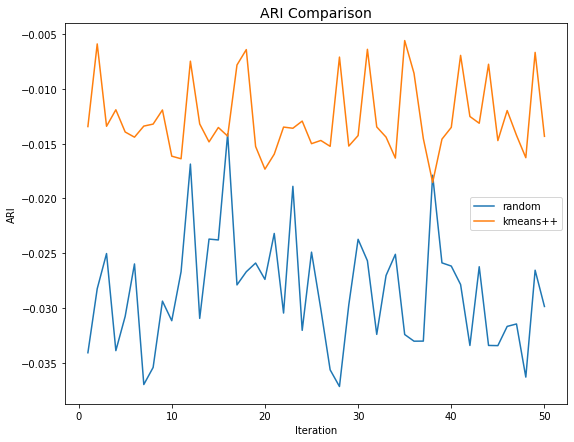

In [67]:
plt.rcParams['figure.figsize'] = (9,7)
plt.title('ARI Comparison', fontsize=14)
plt.plot(x, aris, label='random')
plt.plot(x, aris2, label='kmeans++')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("ARI")
plt.savefig('aris2.png')
plt.show()

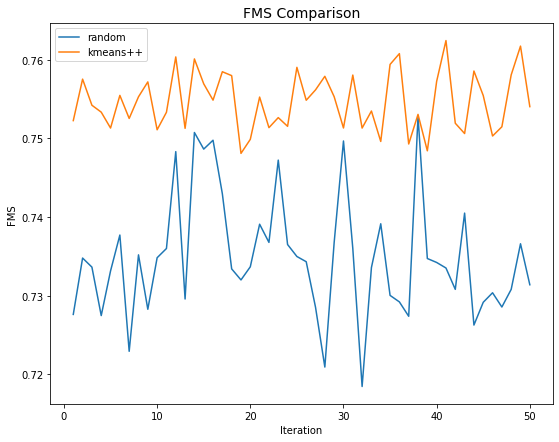

In [68]:
plt.rcParams['figure.figsize'] = (9,7)
plt.title('FMS Comparison', fontsize=14)
plt.plot(x, fmss, label='random')
plt.plot(x, fmss2, label='kmeans++')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("FMS")
plt.savefig('fmss2.png')
plt.show()